In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [33]:
flat_chess = cv2.imread('../../notebooks/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

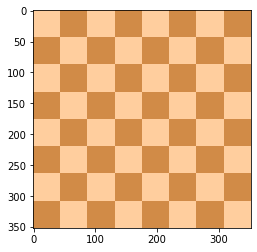

In [34]:
plt.imshow(flat_chess)

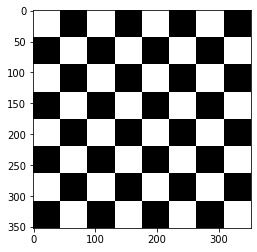

In [9]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')


In [60]:
real_chess = cv2.imread('../../notebooks/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

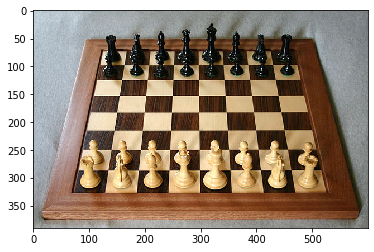

In [61]:
plt.imshow(real_chess)

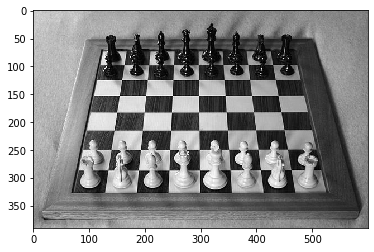

In [12]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

In [17]:
'''
HARRIS CORNER DETECTION.
'''
gray = np.float32(gray_flat_chess)
gray

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

In [38]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(src=dst, kernel=None)
# Multiply the max value of the Harris function results (dst) by 0.01 to take just 1% of its value
# and check if they still larger than 'dst' location to filter 'True' index locations and assign
# a solid color see them highlighted. Those are location, Harris algorithm located as edges.
flat_chess[dst > 0.01 * dst.max()] = [255, 0, 0]

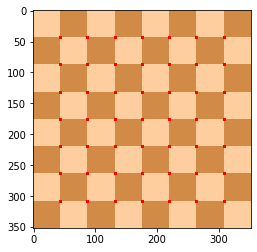

In [39]:
plt.imshow(flat_chess)

In [40]:
# To actual chess board.
gray = gray_real_chess.astype(np.float32)

In [62]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(src=dst, kernel=None)

In [63]:
real_chess[dst > 0.01 * dst.max()] = [255, 0, 0]

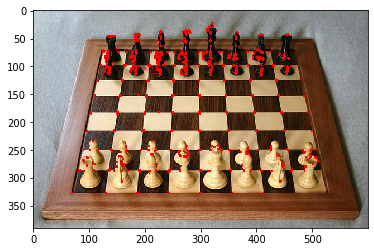

In [64]:
plt.imshow(real_chess)

In [106]:
# Reload the images to reuse.
real_chess = cv2.imread('../../notebooks/DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, code=cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('../../notebooks/DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, code=cv2.COLOR_BGR2RGB)

gray_real_chess = cv2.imread('../../notebooks/DATA/real_chessboard.jpg', flags=0)
gray_flat_chess = cv2.imread('../../notebooks/DATA/flat_chessboard.png', flags=0)

In [91]:
'''
SHI-TOMASI CORNER DETECTION
'''
# This 'cv2.goodFeatureToTrack(...)' function returns a list of lists with (x, y) indexes.
corner = cv2.goodFeaturesToTrack(image=gray_flat_chess,
                                 maxCorners=6,
                                 # Minimum corner quality to rejected. Value should
                                 # be between 0 - 1.
                                 qualityLevel=0.01,
                                 # Minimum "Euclidean" distance between 2 corners (Pixels).
                                 minDistance=10)

corner = corner.astype(np.int0)

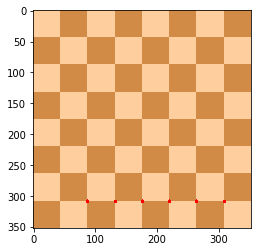

In [92]:
for i in corner:
    x, y = i.ravel()
    cv2.circle(flat_chess, center=(x, y), radius=3, color=(255, 0, 0), thickness=-1)

plt.imshow(flat_chess)

In [107]:
# Now on the real chess board.
corner = cv2.goodFeaturesToTrack(image=gray_real_chess,
                                 maxCorners=110,
                                 qualityLevel=0.01,
                                 minDistance=10)

corner = np.int0(corner)
corner

array([[[178,  91]],

       [[132,  90]],

       [[448,  86]],

       [[183, 105]],

       [[177,  75]],

       [[207, 288]],

       [[248, 183]],

       [[403,  87]],

       [[154, 154]],

       [[278, 258]],

       [[223,  92]],

       [[274, 109]],

       [[299, 249]],

       [[197, 216]],

       [[261,  80]],

       [[243, 286]],

       [[249, 152]],

       [[299, 286]],

       [[299, 214]],

       [[317,  77]],

       [[270,  99]],

       [[145, 215]],

       [[190, 286]],

       [[365,  85]],

       [[246, 216]],

       [[149, 184]],

       [[260, 254]],

       [[227, 110]],

       [[133,  74]],

       [[194, 249]],

       [[246, 249]],

       [[164,  98]],

       [[317, 112]],

       [[200, 184]],

       [[362, 112]],

       [[344, 152]],

       [[298, 182]],

       [[407, 113]],

       [[131, 100]],

       [[316, 248]],

       [[205, 249]],

       [[376, 285]],

       [[350, 249]],

       [[348, 215]],

       [[274,  86]],

       [[2

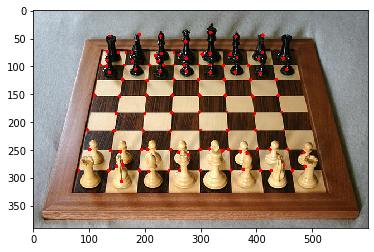

In [108]:
for i in corner:
    x, y = i.ravel()
    cv2.circle(img=real_chess, center=(x, y), radius=3, color=(255, 0, 0), thickness=-1)

plt.imshow(real_chess)